
# PPIDM GENERATION : VERSION AOÛT 2020

## Approach:

In this notebook, the parameters and databases used are the following:
- **DDIs repertory** : Consensus Similarity Matrix, generated by Zia
- **DDI scores** : correct averaged scores
- **Labeled DDIs - negatives** : Negative DDIs generated using a shuffling technique not present in the consensus matrix (5145 DDIs)
- **Labeled DDIs - positives** : GoldStandard (7254 DDIs)
- **Train and Test splitting** : 70% of labeled DDIs for training, and 30% for the test.
- **Precision of the threshold** : 0.01, 0.001 then 0.0001
    

## Results:

### Generated PPIDM:
Fixing the threshold at **0.01586**, the resulting PPIDM corpus contains **84 552 DDIs**.   

&emsp; Metrics on the training set:   
 &emsp;  &emsp; {'recall': '96.38%', 'precision': '98.0%', 'F_score': '97.18%'}  
 &emsp; Metrics on the test set:  
 &emsp;  &emsp; {'recall': '96.28%', 'precision': '98.08%', 'F_score': '97.17%'}


## -------------------------------------------------- The code: ------------------------------------------------------

## Load Data .........................................................................................................................

We first import all necessary packages:

In [39]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import matplotlib

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# import the F_measures function from scikit-learn library
from sklearn.metrics import precision_recall_fscore_support



We then import the **consensus matrix**, **positive** and **negative** labeled DDIs:

In [40]:
matrix = pd.read_pickle("dataframes/consensus_matrix_updated")
positives = pd.read_pickle("dataframes/goldstandard_positives_scored_labeled_splitted")
negatives = pd.read_pickle("dataframes/zia_negatives_notinmatrix_aout2020")

In [41]:
positives

DDI Domain_A Domain_B    IntAct       DIP      MINT  \
0     (PF07319, PF01695)  PF01695  PF07319  0.000000  0.000000  0.000000   
1     (PF00237, PF01196)  PF00237  PF01196  0.000000  0.000000  0.000000   
2              (PF01322)  PF01322  PF01322  0.000000  0.000000  0.000000   
3     (PF00026, PF07966)  PF00026  PF07966  0.000000  0.000000  0.000000   
4              (PF07978)  PF07978  PF07978  0.024793  0.333333  0.000000   
...                  ...      ...      ...       ...       ...       ...   
7249           (PF13981)  PF13981  PF13981  0.000000  0.000000  0.000000   
7250           (PF01746)  PF01746  PF01746  0.034884  0.000000  0.142857   
7251  (PF00139, PF00128)  PF00128  PF00139  0.016990  0.000000  0.264906   
7252  (PF00675, PF05193)  PF00675  PF05193  0.014393  0.065407  0.047341   
7253           (PF11580)  PF11580  PF11580  0.000000  0.000000  0.000000   

       BioGRID  STRING_Ex  STRING_Rest     SIFTS      HPRD  zia_score  \
0     0.000000   0.003535     0.003552  0.670820  0.000000   0.444674   
1     0.003806   0.006209     0.005802  0.100504  0.000000   0.067510   
2     0.000000   0.025000     0.025000  1.000000  0.000000   0.665232   
3     0.005386   0.000145     0.000147  0.357143  0.028375   0.240051   
4     0.015152   0.001385     0.001453  1.000000  0.000000   0.666351   
...        ...        ...          ...       ...       ...        ...   
7249  0.000000   0.000000     0.000000  0.500000  0.000000   0.331126   
7250  0.000000   0.000054     0.000055  1.000000  0.000000   0.664359   
7251  0.000000   0.004544     0.004591  0.041703  0.000000   0.030478   
7252  0.006807   0.004121     0.004602  0.485460  0.142857   0.339719   
7253  0.000000   0.000000     0.000000  1.000000  0.000000   0.662252   

     zia_split_50%  original_score  updated_score real_label split_50  \
0            train        0.444674       0.569032        pos     test   
1             test        0.067510       0.080267        pos    train   
2            train        0.665232       0.851271        pos    train   
3             test        0.240051       0.251721        pos    train   
4             test        0.666351       0.756534        pos     test   
...            ...             ...            ...        ...      ...   
7249          test        0.331126       0.500000        pos    train   
7250          test        0.664359       0.809018        pos     test   
7251         train        0.030478       0.037115        pos     test   
7252         train        0.339719       0.339719        pos     test   
7253         train        0.662252       1.000000        pos     test   

     split_70 split_90  
0       train    train  
1       train    train  
2       train    train  
3       train    train  
4       train    train  
...       ...      ...  
7249    train    train  
7250    train    train  
7251    train    train  
7252    train    train  
7253     test    train  

[7254 rows x 19 columns]

In [42]:
negatives

DDI Domain_A Domain_B  zia_score zia_split_50%  \
1     (PF00633, PF12922)  PF12922  PF00633   0.003536          test   
2     (PF02177, PF00189)  PF02177  PF00189   0.000983         train   
3     (PF00638, PF03062)  PF03062  PF00638   0.000957          test   
4     (PF00719, PF04148)  PF04148  PF00719   0.003578         train   
6     (PF13965, PF00855)  PF13965  PF00855   0.003967          test   
...                  ...      ...      ...        ...           ...   
7247  (PF03856, PF08518)  PF08518  PF03856   0.002165          test   
7249  (PF00319, PF15924)  PF15924  PF00319   0.002247         train   
7250  (PF00572, PF14596)  PF14596  PF00572   0.001905         train   
7251  (PF17135, PF04181)  PF04181  PF17135   0.001652         train   
7252  (PF11315, PF01661)  PF01661  PF11315   0.006040          test   

     real_label split_50 split_70 split_90  
1           neg     test    train    train  
2           neg     test    train    train  
3           neg    train    train    train  
4           neg    train    train    train  
6           neg     test    train    train  
...         ...      ...      ...      ...  
7247        neg     test     test    train  
7249        neg     test     test    train  
7250        neg     test    train    train  
7251        neg     test     test     test  
7252        neg     test     test    train  

[5145 rows x 9 columns]

We verify that no DDI was assigned to the positives and negatives:

In [43]:
len(positives[['DDI']].merge(negatives[['DDI']], on="DDI", how="inner")) 

0

We keep only the columnsof DDIs, scores, the splitting (train/test) and the real label (positive/negative), in this specific order, and according to the parameters described above in the approach:

In [44]:
reduced_positives = positives[['DDI', 'updated_score', 'split_70', 'real_label']]
reduced_negatives = negatives[['DDI', 'zia_score', 'split_70', 'real_label']]
# give similar names to the columns in both dataframe:
reduced_positives.columns = ['DDI', 'score', 'split', 'real_label']
reduced_negatives.columns = ['DDI', 'score', 'split', 'real_label']

We then merge and split the two dataframes in order to get the training and test sets separated:

In [45]:
full_pos_neg = reduced_positives.append(reduced_negatives)
full_pos_neg_train = full_pos_neg[full_pos_neg['split']=='train'][['DDI', 'score', 'real_label']]
full_pos_neg_test = full_pos_neg[full_pos_neg['split']=='test'][['DDI', 'score', 'real_label']]

In [46]:
full_pos_neg.head

<bound method NDFrame.head of                      DDI     score  split real_label
0     (PF07319, PF01695)  0.569032  train        pos
1     (PF00237, PF01196)  0.080267  train        pos
2              (PF01322)  0.851271  train        pos
3     (PF00026, PF07966)  0.251721  train        pos
4              (PF07978)  0.756534  train        pos
...                  ...       ...    ...        ...
7247  (PF03856, PF08518)  0.002165   test        neg
7249  (PF00319, PF15924)  0.002247   test        neg
7250  (PF00572, PF14596)  0.001905  train        neg
7251  (PF17135, PF04181)  0.001652   test        neg
7252  (PF11315, PF01661)  0.006040   test        neg

[12399 rows x 4 columns]>

## Statistical Measures of the scores .........................................................................................

### - Negative & Positive DDIs :

Text(0.5, 1.0, 'Boxplot: Negative & Positive DDIs')

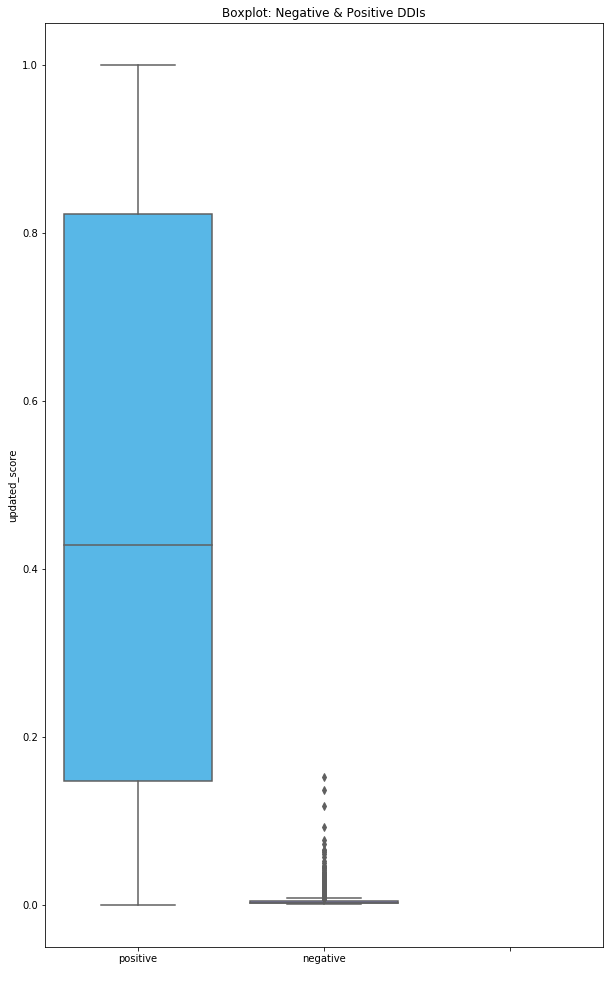

In [47]:
neg = negatives.copy()
neg['updated_score']=neg['zia_score']
both = positives.merge(neg, how='outer', indicator=True)
both[' '] = both['_merge'].apply( lambda x: (x=='left_only')*'positive' + (x=='right_only')*'negative' )
both = both [ (both[' ']=='positive') |  (both[' ']=='negative')]
plt.figure(figsize=(10,17))
plot_both = sns.boxplot(x=' ', y="updated_score", data=both, palette="cool")
plot_both.set_title('Boxplot: Negative & Positive DDIs')

In [48]:
both = both[['DDI', 'updated_score',' ']]
pd.DataFrame(group.describe().rename(columns={'updated_score':name}).squeeze() for name, group in both.groupby(' ')).loc[['positive', 'negative']]

count      mean       std       min       25%       50%       75%  \
positive  7254.0  0.485391  0.352695  0.000030  0.147582  0.428571  0.822354   
negative  5145.0  0.004168  0.006021  0.000503  0.001789  0.002699  0.004390   

               max  
positive  1.000000  
negative  0.152499

### - Negative DDIs :

Text(0.5, 1.0, 'Boxplot: Full Negative DDIs')

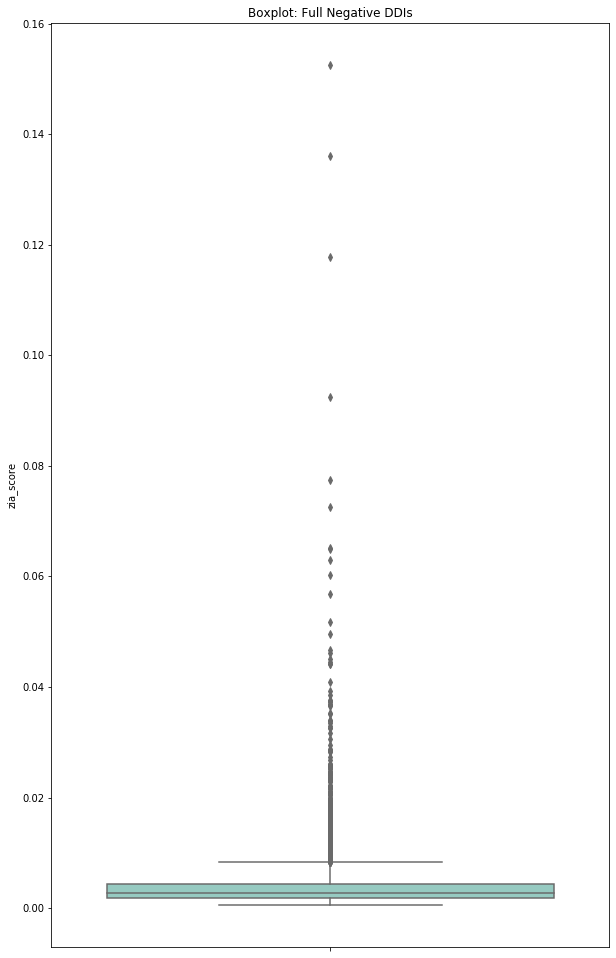

In [49]:
plt.figure(figsize=(10,17))
plot1 = sns.boxplot( y="zia_score", data=negatives, palette="Set3")
plot1.set_title('Boxplot: Full Negative DDIs')

In [50]:
pd.DataFrame(negatives.describe().transpose() )

count      mean       std       min       25%       50%      75%  \
zia_score  5145.0  0.004168  0.006021  0.000503  0.001789  0.002699  0.00439   

                max  
zia_score  0.152499


Separate the tain and test DDIs:

Text(0.5, 1.0, 'Boxplot: Negative DDIs, train and test scores')

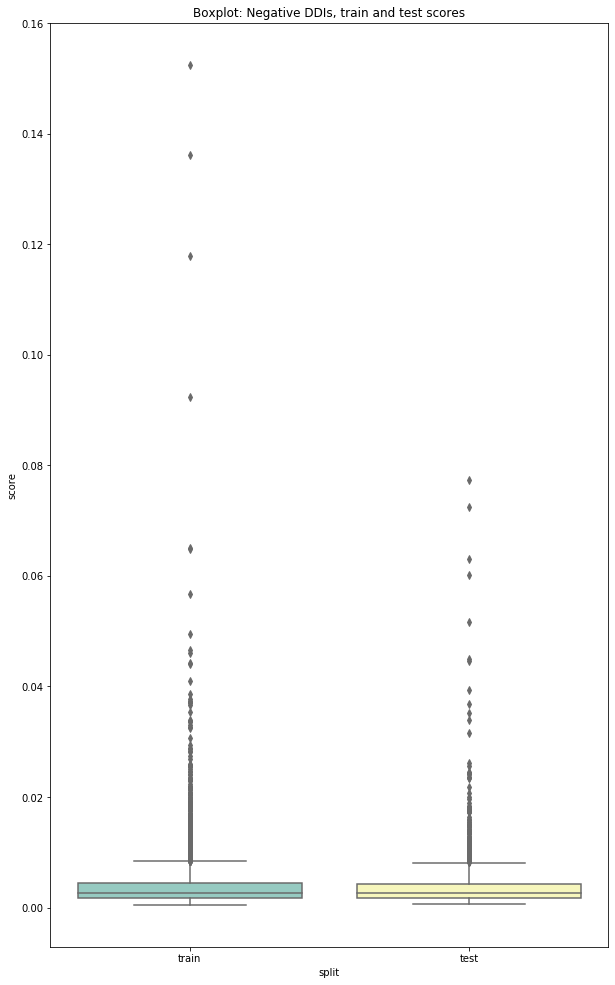

In [51]:
plt.figure(figsize=(10,17))
plot1 = sns.boxplot(x="split", y="score", data=reduced_negatives, palette="Set3")
plot1.set_title('Boxplot: Negative DDIs, train and test scores')

(0, 0.015)

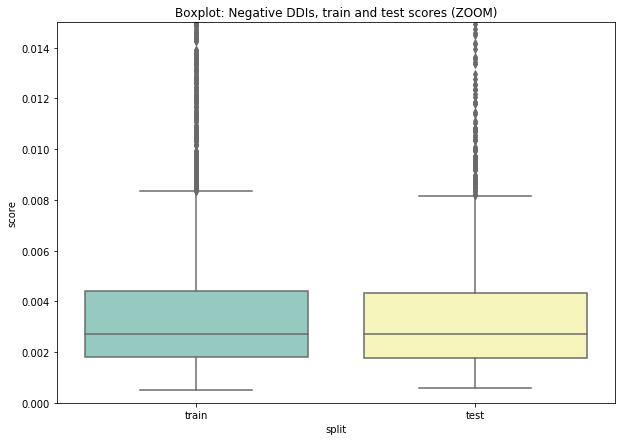

In [52]:
# Let's ZOOM on the the [0, 0.002] scores interval:
plt.figure(figsize=(10,7))
plot2 = sns.boxplot(x="split", y="score", data=reduced_negatives, palette="Set3")
plot2.set_title('Boxplot: Negative DDIs, train and test scores (ZOOM)')
plot2.set_ylim(0, 0.015)


The table bellow gives a summary of the distribution of the negative DDIs scores:

In [53]:
pd.DataFrame(group.describe().rename(columns={'score':name}).squeeze() for name, group in reduced_negatives.groupby('split'))

count      mean       std       min       25%       50%       75%  \
test   1544.0  0.004093  0.005401  0.000578  0.001768  0.002700  0.004325   
train  3601.0  0.004200  0.006268  0.000503  0.001809  0.002699  0.004421   

            max  
test   0.077382  
train  0.152499

### - Positive DDIs

Text(0.5, 1.0, 'Boxplot: Full Positive DDIs')

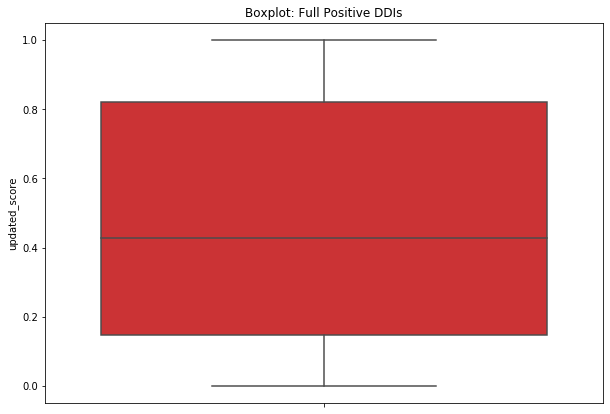

In [54]:
plt.figure(figsize=(10,7))
plot1 = sns.boxplot( y="updated_score", data=positives, palette="Set1")
plot1.set_title('Boxplot: Full Positive DDIs')

In [55]:
pd.DataFrame(negatives.describe().transpose() )

count      mean       std       min       25%       50%      75%  \
zia_score  5145.0  0.004168  0.006021  0.000503  0.001789  0.002699  0.00439   

                max  
zia_score  0.152499


Separate the tain and test DDIs:


Text(0.5, 1.0, 'Boxplot: Positive DDIs, train and test scores')

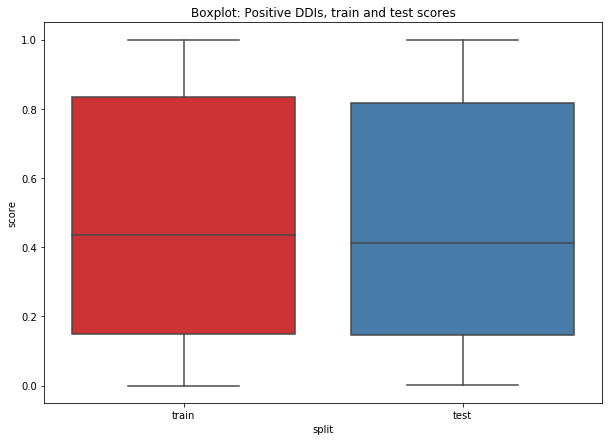

In [56]:
plt.figure(figsize=(10,7))
plot3 = sns.boxplot(x="split", y="score", data=reduced_positives, palette="Set1")
plot3.set_title('Boxplot: Positive DDIs, train and test scores')

In [57]:
pd.DataFrame(group.describe().rename(columns={'score':name}).squeeze() for name, group in reduced_positives.groupby('split'))

count      mean       std       min       25%       50%       75%  max
test   2177.0  0.475669  0.351768  0.000119  0.145442  0.413321  0.815878  1.0
train  5077.0  0.489560  0.353045  0.000030  0.149090  0.434609  0.833333  1.0


<br>  
## Threshold selection  ................................................................................................................
 
Now we will define three necessary functions used to select the best threshold.
<br>  
The `threshold_splitting` function splits a given dataframe of scored DDIs into positives and negatives, given a specific threshold:

In [58]:
def threshold_splitting(T, df):
    # Inputs:
    #   - a threshold T
    #   - a dataframe df of DDIs in first column, scores in the second, real_label in the last
    # Output:
    #   - a dataframe df of DDIs in first column, real_label in the second, predicted_label in the last
    scores = pd.DataFrame(df.iloc[:,1])
    predictions = scores.applymap(lambda x: (x>=T)*'pos' + (x<T)*'neg')
    predictions.columns = ['predicted_label']
    return pd.concat([df[['DDI', 'real_label']], predictions], axis=1)


the `F_measures` function calculate the F-score, recall and precision measures, given a dataframe with a column of real values and another one containing predicted values:

In [59]:
def F_measures(df):
    # Input:
    #   - a dataframe df of DDIs in first column, real_label in the second, predicted_label in the last
    #      (this input corresponds to the output of function "threshold_splitting")
    # Output:
    #   - a dictionnary containg the F_score, recall and precision of the predicted labels        
    precision, recall, Fscore, b = precision_recall_fscore_support(df.iloc[:,1], df.iloc[:,2], pos_label='pos', average='binary')
    return { 'recall':recall, 'precision':precision, 'F_score':Fscore}

The `optimize_threshold` function selects a threshold trained on the training set, show a plot of the variation of the F-score when variying the threshold, and then prints the results = F-measures on the training and test sets using the optimal threshold:

In [60]:
def optimize_threshold(df_train, df_test, precision, start=0, end=1, save=False, name='none'):
    # Inputs:
    #   - a dataframe df_train, the training set, containing the DDIs in first column, 
    #     scores in the second, real_label in the last.
    #   - a dataframe df_test, the test set, containing the DDIs in first column, 
    #     scores in the second, real_label in the last.
    #   - a precision of the threshold selection, can either be 0.01 or 0.001
    #   - start and end define the interval in which we search for the optimal threshold
    # Output:
    #   - the threshold which gives the highest value of F-score on the training set
    T_values = arange(start,end+precision,precision)
    F_scores = []
    for T in T_values:
        pred_df = threshold_splitting(T, df_train)
        dic_measures = F_measures(pred_df)
        F_scores.append( dic_measures['F_score'] )
    # plot the variation of the F_score when the threshold varies
    
#    plt.figure(figsize=(40,40))
#    matplotlib.rc('font', **{'size':40})
    plt.plot(T_values, F_scores)
    plt.ylabel('F-score evolution')
    plt.xlabel('threshold T')
    if save:
        plt.savefig('resulting_graphs/'+name+'.png')
    plt.show()
    # print results
    optimal_F_score = max(F_scores)
    optimal_threshold = T_values[ F_scores.index(max(F_scores))]
    dic_measures_train = F_measures( threshold_splitting(optimal_threshold, df_train))
    dic_measures_test = F_measures( threshold_splitting(optimal_threshold, df_test))
    print("Precision of the threshold: ", precision, '.')
    print("Optimal threshold T: ", optimal_threshold,'.')
    print("Measures on the training set:")
    print({ k:str(round(v*100,2))+'%' for k, v in dic_measures_train.items()})
    print("Measures on the test set:")
    print({ k:str(round(v*100,2))+'%' for k, v in dic_measures_test.items()})
    return optimal_threshold

In [61]:

plt.figure(figsize=(40,40))
matplotlib.rc('font', **{'size':10})

plt.figure(figsize=(5,5))
matplotlib.rc('font', **{'size':10})

<Figure size 2880x2880 with 0 Axes>

<Figure size 360x360 with 0 Axes>

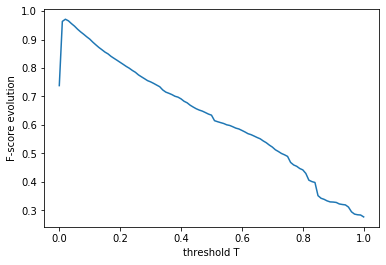

Precision of the threshold:  0.01 .
Optimal threshold T:  0.02 .
Measures on the training set:
{'recall': '95.57%', 'precision': '98.72%', 'F_score': '97.12%'}
Measures on the test set:
{'recall': '95.68%', 'precision': '98.91%', 'F_score': '97.27%'}


In [62]:
T_opt = optimize_threshold(full_pos_neg_train, full_pos_neg_test, 0.01, save=True, name="precision_01")

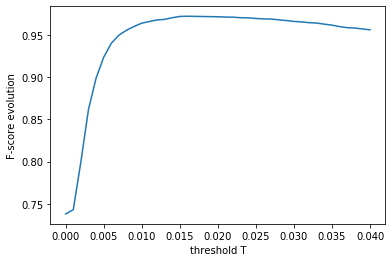

Precision of the threshold:  0.001 .
Optimal threshold T:  0.016 .
Measures on the training set:
{'recall': '96.36%', 'precision': '98.02%', 'F_score': '97.18%'}
Measures on the test set:
{'recall': '96.28%', 'precision': '98.13%', 'F_score': '97.19%'}


In [63]:
T_opt = optimize_threshold(full_pos_neg_train, full_pos_neg_test, 0.001, start=0, end=0.04, save=True, name="precision_001")

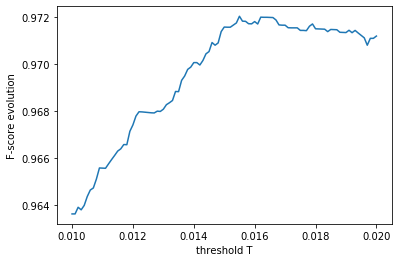

Precision of the threshold:  0.0001 .
Optimal threshold T:  0.015499999999999967 .
Measures on the training set:
{'recall': '96.47%', 'precision': '97.94%', 'F_score': '97.2%'}
Measures on the test set:
{'recall': '96.42%', 'precision': '98.04%', 'F_score': '97.22%'}


In [64]:
T_opt = optimize_threshold(full_pos_neg_train, full_pos_neg_test, 0.0001, start=0.01, end=0.02, save=True, name="precision_0001")

In [65]:
T_opt = 0.0155

The optimal threshold seems to be **0.0155**, but because of the fluctuations, and in order to avoid overfitting the training set, we will go through the K-Folds Cross Validation approach to select the optimal threshold as the mean of the thresholds of 5-folds :

## K.Folds cross validation approach ....................................................................................

In [66]:
# extract training positives and negatives:
reduced_positives_train = reduced_positives[reduced_positives['split']=='train'][['DDI', 'score', 'real_label']]
reduced_negatives_train = reduced_negatives[reduced_negatives['split']=='train'][['DDI', 'score', 'real_label']]

# extract testing positives and negatives:
reduced_positives_test = reduced_positives[reduced_positives['split']=='test'][['DDI', 'score', 'real_label']]
reduced_negatives_test = reduced_negatives[reduced_negatives['split']=='test'][['DDI', 'score', 'real_label']]

# merging the test positives and negatives
full_pos_neg_test =  reduced_positives_test.append(reduced_negatives_test)

In [67]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [68]:
# split the train section into folds
pos_train_folds = []
neg_train_folds = []
for pos_pre_train, pos_pre_test in kf.split(reduced_positives_train):
    pos_pre_train = reduced_positives_train.iloc[pos_pre_train,]
    pos_pre_test = reduced_positives_train.iloc[pos_pre_test,]
    pos_pre_train = pos_pre_train[['DDI', 'score', 'real_label']]
    pos_pre_test = pos_pre_test[['DDI', 'score', 'real_label']]
    pos_train_folds.append([pos_pre_train, pos_pre_test])
for neg_pre_train, neg_pre_test in kf.split(reduced_negatives_train): 
    neg_pre_train = reduced_negatives_train.iloc[neg_pre_train,]
    neg_pre_test = reduced_negatives_train.iloc[neg_pre_test,]
    neg_pre_train = neg_pre_train[['DDI', 'score', 'real_label']]
    neg_pre_test = neg_pre_test[['DDI', 'score', 'real_label']]
    neg_train_folds.append([neg_pre_train, neg_pre_train])




############## FOLD 1  ######################################


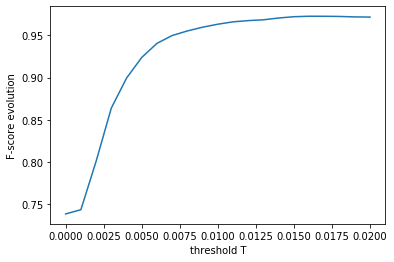

Precision of the threshold:  0.001 .
Optimal threshold T:  0.016 .
Measures on the training set:
{'recall': '96.55%', 'precision': '98.0%', 'F_score': '97.27%'}
Measures on the test set:
{'recall': '95.57%', 'precision': '92.39%', 'F_score': '93.95%'}


############## FOLD 2  ######################################


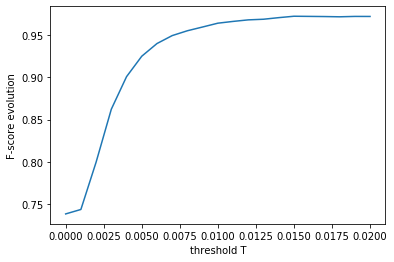

Precision of the threshold:  0.001 .
Optimal threshold T:  0.015 .
Measures on the training set:
{'recall': '96.63%', 'precision': '97.86%', 'F_score': '97.24%'}
Measures on the test set:
{'recall': '96.26%', 'precision': '91.92%', 'F_score': '94.04%'}


############## FOLD 3  ######################################


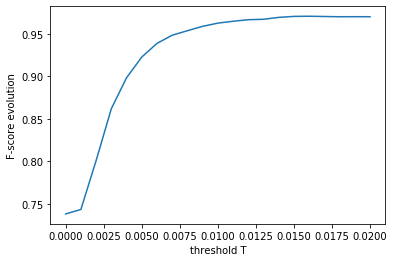

Precision of the threshold:  0.001 .
Optimal threshold T:  0.016 .
Measures on the training set:
{'recall': '96.18%', 'precision': '97.94%', 'F_score': '97.06%'}
Measures on the test set:
{'recall': '97.04%', 'precision': '92.31%', 'F_score': '94.62%'}


############## FOLD 4  ######################################


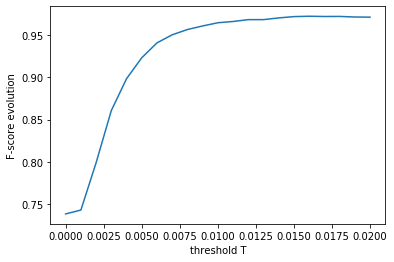

Precision of the threshold:  0.001 .
Optimal threshold T:  0.016 .
Measures on the training set:
{'recall': '96.31%', 'precision': '98.19%', 'F_score': '97.24%'}
Measures on the test set:
{'recall': '96.55%', 'precision': '93.16%', 'F_score': '94.82%'}


############## FOLD 5  ######################################


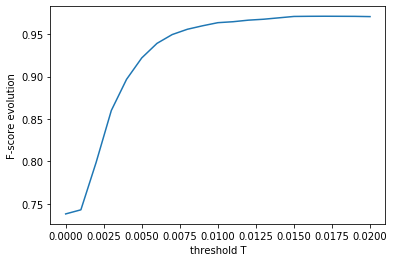

Precision of the threshold:  0.001 .
Optimal threshold T:  0.017 .
Measures on the training set:
{'recall': '96.11%', 'precision': '98.14%', 'F_score': '97.11%'}
Measures on the test set:
{'recall': '96.35%', 'precision': '92.97%', 'F_score': '94.63%'}


Mean threshold:  0.016 .


In [69]:
# mine the optimal threshold for each fold:
thresholds_1 = []
for i in range(5):
    pos = pos_train_folds[i]; neg = neg_train_folds[i]
    full_pos_neg_pre_train = pos[0].append(neg[0])
    full_pos_neg_pre_test = pos[1].append(neg[1])
    print()
    print()
    print("############## FOLD", 1+i, " ######################################")
    T_opt1 = optimize_threshold(full_pos_neg_pre_train, full_pos_neg_pre_test, 0.001, start=0, end=0.02, save=True, name="precision_001_fold_"+str(i+1))
    thresholds_1.append(T_opt1)
print()
print()
print("Mean threshold: ", mean(thresholds_1),'.')




############## FOLD 1  ######################################


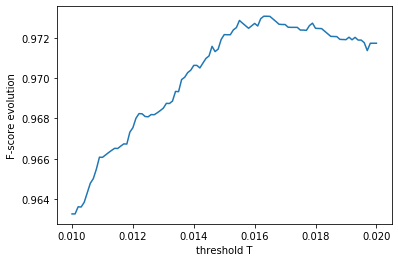

Precision of the threshold:  0.0001 .
Optimal threshold T:  0.01629999999999996 .
Measures on the training set:
{'recall': '96.53%', 'precision': '98.1%', 'F_score': '97.31%'}
Measures on the test set:
{'recall': '95.47%', 'precision': '92.73%', 'F_score': '94.08%'}


############## FOLD 2  ######################################


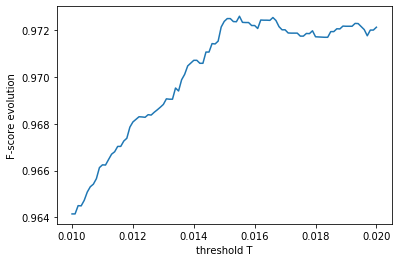

Precision of the threshold:  0.0001 .
Optimal threshold T:  0.015499999999999967 .
Measures on the training set:
{'recall': '96.55%', 'precision': '97.98%', 'F_score': '97.26%'}
Measures on the test set:
{'recall': '96.16%', 'precision': '92.34%', 'F_score': '94.21%'}


############## FOLD 3  ######################################


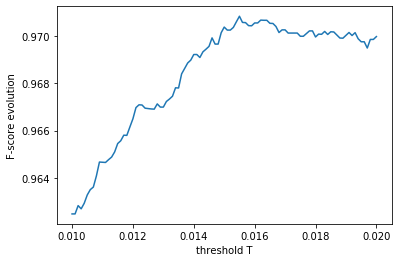

Precision of the threshold:  0.0001 .
Optimal threshold T:  0.015499999999999967 .
Measures on the training set:
{'recall': '96.33%', 'precision': '97.85%', 'F_score': '97.08%'}
Measures on the test set:
{'recall': '97.04%', 'precision': '91.97%', 'F_score': '94.44%'}


############## FOLD 4  ######################################


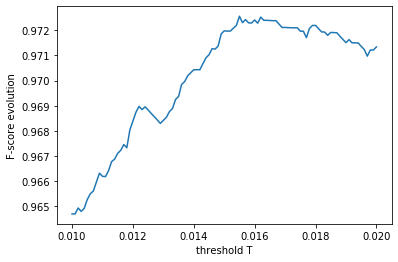

Precision of the threshold:  0.0001 .
Optimal threshold T:  0.015499999999999967 .
Measures on the training set:
{'recall': '96.41%', 'precision': '98.12%', 'F_score': '97.26%'}
Measures on the test set:
{'recall': '96.75%', 'precision': '92.9%', 'F_score': '94.79%'}


############## FOLD 5  ######################################


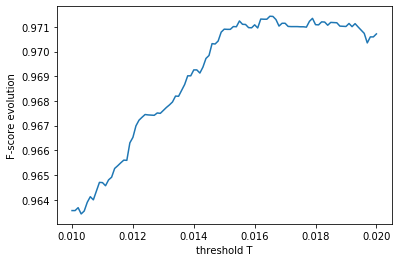

Precision of the threshold:  0.0001 .
Optimal threshold T:  0.01649999999999996 .
Measures on the training set:
{'recall': '96.26%', 'precision': '98.04%', 'F_score': '97.14%'}
Measures on the test set:
{'recall': '96.45%', 'precision': '92.62%', 'F_score': '94.5%'}


Mean threshold:  0.015859999999999964 .


In [70]:
thresholds_2 = []
for i in range(5):
    pos = pos_train_folds[i]; neg = neg_train_folds[i]
    full_pos_neg_pre_train = pos[0].append(neg[0])
    full_pos_neg_pre_test = pos[1].append(neg[1])
    print()
    print()
    print("############## FOLD", 1+i, " ######################################")
    T_opt2 = optimize_threshold(full_pos_neg_pre_train, full_pos_neg_pre_test, 0.0001, start=0.01, end=0.02, save=True, name="precision_0001_fold_"+str(i+1))
    thresholds_2.append(T_opt2)
    
print()
print()
print("Mean threshold: ", mean(thresholds_2),'.')

<br>  
Now we will recalculate the three f-measures on the full training and test sets using the mean threshold:

In [71]:
mean_threshold = 0.01586
optimal_threshold = mean_threshold
dic_measures_train = F_measures( threshold_splitting(optimal_threshold, full_pos_neg_train))
dic_measures_test = F_measures( threshold_splitting(optimal_threshold, full_pos_neg_test))
print("Optimal threshold T: ", optimal_threshold,'.')
print("Measures on the training set:")
print({ k:str(round(v*100,2))+'%' for k, v in dic_measures_train.items()})
print("Measures on the test set:")
print({ k:str(round(v*100,2))+'%' for k, v in dic_measures_test.items()})

Optimal threshold T:  0.01586 .
Measures on the training set:
{'recall': '96.38%', 'precision': '98.0%', 'F_score': '97.18%'}
Measures on the test set:
{'recall': '96.28%', 'precision': '98.08%', 'F_score': '97.17%'}


## Generation of new PPIDM ........................................................................................................

In [72]:
PPIDM_version_aout2020 = matrix[matrix['updated_score']>= mean_threshold]
print("The threshold applied:", mean_threshold)
print("Total number of DDIs:", PPIDM_version_aout2020.shape[0])
PPIDM_version_aout2020

The threshold applied: 0.01586
Total number of DDIs: 84552


DDI Domain_A Domain_B    IntAct       DIP      MINT  \
38       (PF03641, PF14793)  PF03641  PF14793  0.000000  0.000000  0.000000   
41       (PF03641, PF10410)  PF03641  PF10410  0.037689  0.353553  0.000000   
108               (PF03641)  PF03641  PF03641  0.000000  0.000000  0.000000   
154      (PF04316, PF03641)  PF03641  PF04316  0.029566  0.000000  0.000000   
181      (PF03641, PF03740)  PF03641  PF03740  0.041030  0.000000  0.000000   
...                     ...      ...      ...       ...       ...       ...   
4592660  (PF02017, PF06991)  PF02017  PF06991  0.016598  0.000000  0.000000   
4592689  (PF02017, PF09230)  PF02017  PF09230  0.133485  0.000000  0.260133   
4592718  (PF10240, PF02017)  PF02017  PF10240  0.000000  0.000000  0.000000   
4592739  (PF02017, PF13903)  PF02017  PF13903  0.020101  0.000000  0.000000   
4592762           (PF02017)  PF02017  PF02017  0.136364  0.000000  0.368421   

          BioGRID  STRING_Ex  STRING_Rest     SIFTS      HPRD  original_score  \
38       0.000000   0.000000     0.000000  0.426401  0.000000        0.282385   
41       0.000000   0.001488     0.001493  0.000000  0.000000        0.003767   
108      0.000000   0.000358     0.000360  1.000000  0.000000        0.662294   
154      0.000000   0.000000     0.000000  0.000000  0.000000        0.000979   
181      0.000000   0.000000     0.000000  0.000000  0.000000        0.001359   
...           ...        ...          ...       ...       ...             ...   
4592660  0.000000   0.000000     0.000000  0.000000  0.000000        0.000550   
4592689  0.091928   0.011765     0.012209  0.707107  0.363803        0.522283   
4592718  0.020353   0.000000     0.000000  0.000000  0.000000        0.001213   
4592739  0.000000   0.000000     0.000000  0.000000  0.000000        0.000666   
4592762  0.112676   0.011315     0.011615  1.000000  0.352941        0.717018   

         updated_score  
38            0.426401  
41            0.023700  
108           0.847512  
154           0.029566  
181           0.041030  
...                ...  
4592660       0.016598  
4592689       0.525765  
4592718       0.020353  
4592739       0.020101  
4592762       0.721799  

[84552 rows x 13 columns]

In [73]:
# save PPIDM dataframe:
#PPIDM_version_aout2020.to_csv('resulting_df/regenerated_PPIDM_aout2020.csv', index = False)
#PPIDM_version_aout2020.to_pickle("resulting_df/regenerated_PPIDM_aout2020")

## Creating a "pfam-pfam-interaction" file for the classification code .................................

In [74]:
import pandas as pd
matrix = pd.read_csv("dataframes/consensus_matrix_updated.csv", index_col=0)
mean_threshold = 0.01586
ppidm = matrix[matrix['updated_score']>= mean_threshold] 
new_ppi = ppidm.drop( axis=1,columns=['DDI', 'original_score'])
new_ppi.columns = [i for i in range(11)]
new_ppi.index = [i for i in range(new_ppi.shape[0])]

In [75]:
print(new_ppi.shape)
new_ppi.head()

(84552, 11)


0        1         2         3    4    5         6         7   \
0  PF03641  PF14793  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
1  PF03641  PF10410  0.037689  0.353553  0.0  0.0  0.001488  0.001493   
2  PF03641  PF03641  0.000000  0.000000  0.0  0.0  0.000358  0.000360   
3  PF03641  PF04316  0.029566  0.000000  0.0  0.0  0.000000  0.000000   
4  PF03641  PF03740  0.041030  0.000000  0.0  0.0  0.000000  0.000000   

         8    9         10  
0  0.426401  0.0  0.426401  
1  0.000000  0.0  0.023700  
2  1.000000  0.0  0.847512  
3  0.000000  0.0  0.029566  
4  0.000000  0.0  0.041030

In [76]:
# save the final file:
#new_ppi.to_csv('resulting_df/pfam_pfam_interaction_84552.csv',sep="\t", header=False, index=False)

In [4]:
import pandas as pd
ppi = pd.read_csv('resulting_df/pfam_pfam_interaction_84552.csv',sep="\t", header=None)

In [6]:
# display the dataframe sorting the rows in ascendant order of the score (last column)
ppi.sort_values(10)

0        1         2         3         4         5         6   \
35451  PF03313  PF03459  0.052414  0.000000  0.000000  0.000000  0.000629   
24677  PF01391  PF05507  0.000000  0.000000  0.000000  0.020464  0.009633   
54736  PF02148  PF08619  0.015441  0.113228  0.041885  0.002383  0.000000   
21996  PF04612  PF07963  0.000000  0.000000  0.000000  0.000000  0.015857   
67524  PF02287  PF06180  0.000000  0.000000  0.000000  0.000000  0.015861   
...        ...      ...       ...       ...       ...       ...       ...   
53190  PF02884  PF02884  0.000000  0.000000  0.000000  0.000000  0.000000   
38068  PF03881  PF03881  0.000000  0.000000  0.000000  0.000000  0.000000   
38082  PF03331  PF03331  0.000000  0.000000  0.000000  0.000000  0.000000   
16547  PF12192  PF12192  0.000000  0.000000  0.000000  0.000000  0.000000   
30082  PF09642  PF09642  0.000000  0.000000  0.000000  0.000000  0.000000   

             7    8         9         10  
35451  0.000000  0.0  0.000000  0.015860  
24677  0.009360  0.0  0.020113  0.015860  
54736  0.000000  0.0  0.000000  0.015860  
21996  0.015868  0.0  0.000000  0.015861  
67524  0.015861  0.0  0.000000  0.015861  
...         ...  ...       ...       ...  
53190  0.000000  1.0  0.000000  1.000000  
38068  0.000000  1.0  0.000000  1.000000  
38082  0.000000  1.0  0.000000  1.000000  
16547  0.000000  1.0  0.000000  1.000000  
30082  0.000000  1.0  0.000000  1.000000  

[84552 rows x 11 columns]